# Example MNIST classifier

This notebook shows an example of model initialization, training and testing.

1. You first have to initialize your model by passing all configuration as parameters.
    - It will initialize all saving directories. 
    - Initializes the `tf.keras.Model` architecture (the actual model)
    - Save all configuration / weights in its directory (`pretrained_models/{model_name}`)
2. You can now *restore* your model just by calling the constructor with `nom = model_name`. 
    - It checks whether the model exists or not (if it has already been initialized). If yes, it will load all its saved configuration and load checkpoints
3. You have to **compile** your model : specify its loss, optimizer, metrics and their configuration. 
    - In theory, all these elements can be directly specified in your model's class `compile()` function but it is useful if you want a custom learning-rate for your optimizer.
3. Now your model is ready, you can load the training dataset with the `get_dataset()` function
4. Everything is ready, let's first check your dataset before training : it is really important to not train your model with corrupted data !
5. Now that everything is okay, let's train ! Just call the `train` method with all configuration you want !
6. Now you can perform prediction with your model or compute its confusion matrix :)

Note that after the training is completed, model will be saved such that when you *restore* it, it will load the latest checkpoint.

*This repository is not the official classification repository, meaning that it is not integrated with the new interfaces and thus many features are not available. It is an example of how to build, traing, restore and predict with the `BaseModel` class*

## Imports + model initialization

For the 1st model initialization, you have to pass all required configuration asargument to the constructor. 

After this creation, you **do not need** to repass them all the time ! just call its constructor with `nom = model_name` and all configuration will be automatically loaded !

In [1]:
import pandas as pd
import tensorflow as tf

from utils import set_display_options, plot, plot_multiple, plot_confusion_matrix
from datasets import get_dataset, prepare_dataset, test_dataset_time
from models.classification import BaseClassifier

set_display_options()

model_name = 'mnist_classifier'
print("Tensorflow version : {}".format(tf.__version__))

Tensorflow version : 2.6.2


In [2]:
input_shape = (28, 28, 1)
model = BaseClassifier(input_shape, labels = list(range(10)), nom = model_name)

print(model)

Initializing model with kwargs : {'classifier': {'architecture_name': 'simple_cnn', 'input_shape': (28, 28, 1), 'output_shape': 10, 'n_conv': 2, 'filters': 16, 'kernel_size': 3, 'strides': 1, 'pooling': 'max', 'dense_as_final': True, 'n_dense': 1, 'dense_size': 64, 'final_activation': 'softmax', 'final_name': 'classification_layer', 'name': 'cnn_classifier'}}
Initializing submodel : `classifier` !
Submodel classifier saved in pretrained_models\mnist_classifier\saving\classifier.json !
Model mnist_classifier initialized successfully !

========== mnist_classifier ==========
Sub model classifier
- Inputs 	: (None, 28, 28, 1)
- Outputs 	: (None, 10)
- Number of layers 	: 16
- Number of parameters 	: 0.028 Millions
- Model not compiled

Already trained on 0 epochs (0 steps)

Labels : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Multi-class : False



## Model instanciation + dataset loading

As previously mentionned, once initialized, your model can be restored just by passing its name as argument. Furthermore, all models are `Singleton` such that if your model has already been restored, it will return the existing instance and will not restore it !

In [3]:
model = BaseClassifier(nom = model_name)

model.compile()

print(model)
model.summary()

Optimizer 'classifier_optimizer' initilized successfully !
Submodel classifier compiled !
  Loss : {'reduction': 'none', 'name': 'sparse_categorical_crossentropy', 'from_logits': False}
  Optimizer : {'name': 'Adam', 'learning_rate': 0.001, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
  Metrics : [{'name': 'sparse_categorical_accuracy', 'dtype': 'float32'}]

========== mnist_classifier ==========
Sub model classifier
- Inputs 	: (None, 28, 28, 1)
- Outputs 	: (None, 10)
- Number of layers 	: 16
- Number of parameters 	: 0.028 Millions
- Optimizer 	: {'name': 'Adam', 'learning_rate': 0.001, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
- Loss 	 : {'reduction': 'none', 'name': 'sparse_categorical_crossentropy', 'from_logits': False}
- Metrics	 : [{'name': 'sparse_categorical_accuracy', 'dtype': 'float32'}]

Already trained on 0 epochs (0 steps)

Labels : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Multi-class : False


=========

In [4]:
ds = get_dataset('mnist')

train, valid = ds['train'], ds['test']
print(train)
print(valid)

<PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>
<PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>


## Training + history analysis

Before training, I strongly advise you to check your dataset by running the last cell of this notebook : it will run your dataset with the training configuration and outputs some statistics about batches. It can be useful to detect errors / unconsistencies / unexpected behaviour before training.

In [5]:
model.train(
    train, validation_data = valid,
    epochs = 5, batch_size = 64,
    augment_prct = 0.25
)

Training config :
HParams :
- augment_prct	: 0.25
- batch_size	: 64
- train_batch_size	: None
- valid_batch_size	: None
- test_batch_size	: 1
- shuffle_size	: 1024
- epochs	: 5
- verbose	: 1
- train_times	: 1
- valid_times	: 1
- train_size	: None
- valid_size	: None
- test_size	: 4
- pred_step	: -1

Running on 1 GPU

Epoch 1 / 5
Epoch 1/5
938/938 [==============================] - 16s 12ms/step - loss: 1.7751 - sparse_categorical_accuracy: 0.8395 - val_loss: 1.4988 - val_sparse_categorical_accuracy: 0.9655

Saving at epoch 1 !

Making prediction at step 938

Epoch 2 / 5
Epoch 2/5
938/938 [==============================] - 10s 10ms/step - loss: 1.5256 - sparse_categorical_accuracy: 0.9423 - val_loss: 1.4883 - val_sparse_categorical_accuracy: 0.9736

Saving at epoch 2 !

Making prediction at step 1876

Epoch 3 / 5
Epoch 3/5
938/938 [==============================] - 9s 10ms/step - loss: 1.5118 - sparse_categorical_accuracy: 0.9531 - val_loss: 1.4848 - val_sparse_categorical_accuracy: 0.9

===== History =====
       loss  sparse_categorical_accuracy  val_loss  val_sparse_categorical_accuracy
0  1.631175                     0.839450  1.498770                           0.9655
1  1.522232                     0.942317  1.488304                           0.9736
2  1.510385                     0.953100  1.484843                           0.9773
3  1.504392                     0.958250  1.481846                           0.9802
4  1.502858                     0.959450  1.480558                           0.9809


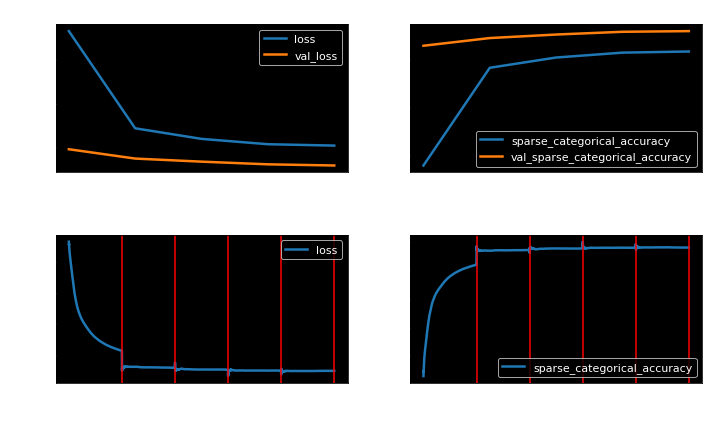

In [6]:
print(model.history)
model.plot_history()

In [7]:
print("Training config :")
print(pd.DataFrame(model.history.trainings_config))
print("\nTraining informations :")
print(pd.DataFrame(model.history.trainings_infos))


Training config :
   augment_prct  batch_size  epochs  pred_step  shuffle_size  test_batch_size  test_size train_batch_size train_size  \
0          0.25          64       5         -1          1024                1          4             None       None   

   train_times valid_batch_size valid_size  valid_times  verbose  
0            1             None       None            1        1  

Training informations :
                         end  final_epoch  interrupted                      start  start_epoch       time
0 2022-09-27 10:53:24.159021            4        False 2022-09-27 10:52:02.648709           -1  81.510312


## Prediction

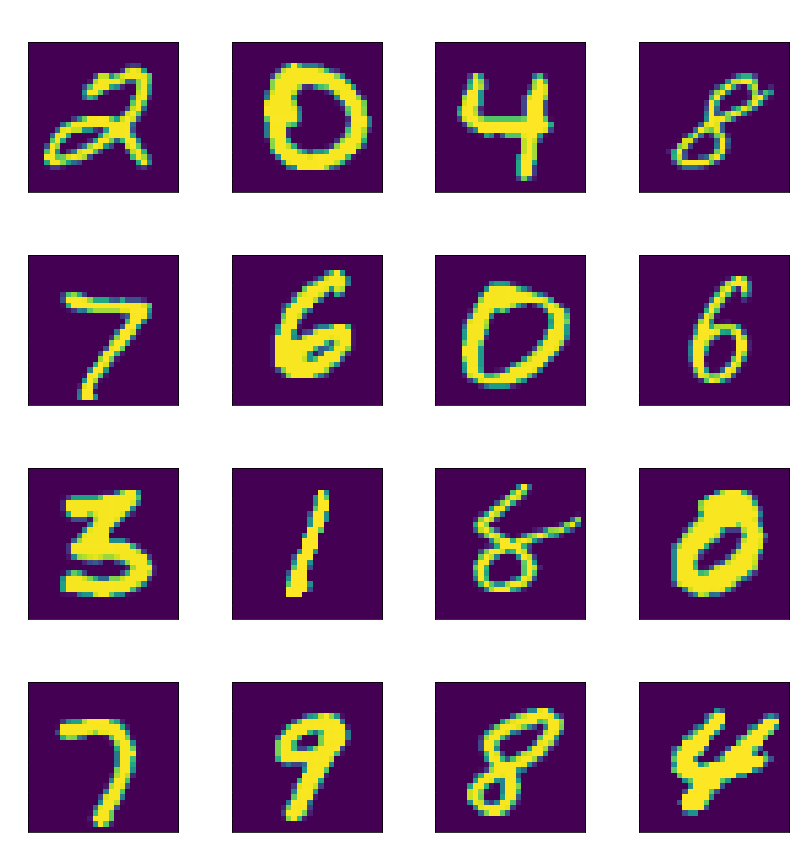

In [8]:
predictions = {}
for i, data in enumerate(valid):
    if i >= 16: break
    image, label = data['image'], data['label']
    
    pred, score = model.predict(image)[0]
    predictions['Pred n°{}\nClass : {} ({} ({:.2f}%))'.format(i, label, pred, score * 100)] = image

plot_multiple(** predictions, ncols = 4, plot_type = 'imshow')

## Confusion matrix

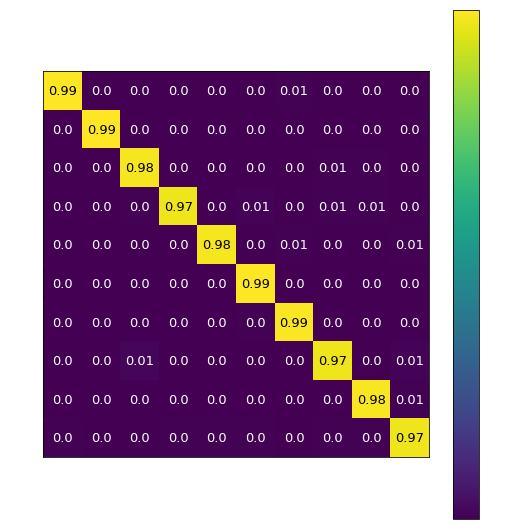

In [9]:
images, labels = [], []
for data in valid:
    images.append(data['image'])
    labels.append(data['label'])

pred = model.predict(images)
pred = [p[0] for p in pred] # p[1] is the confidence score

plot_confusion_matrix(true = labels, pred = pred, norm = True)

## Test dataset performance

These 3 lines allow you to debug your processing pipeline and test its performances

As you can see, the dataset correctly produces images of size `(28, 28, 1)` (grayscale) with values in range `[0, 1]`

**Important note** : the statistics are shown on the last generated batch. It is the reason why the 1st dimension (*batch_size*) do not corresponds to the actual `batch_size` argument because the dataset size is not a multiple of *64*.

In [10]:
from loggers import set_level

set_level('debug', 'datasets') # the 2nd argument tells to only set the `datasets.*` module to debug

config = model.get_dataset_config(is_validation = False, batch_size = 64)

ds_train = prepare_dataset(train, ** config)
test_dataset_time(ds_train, steps = 1000)

Original dataset : <PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>
- Dataset after mapping : <ParallelMapDataset shapes: ((28, 28, 1), ()), types: (tf.float32, tf.int32)>
- Dataset after batch : <BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int32)>


100%|███████████████████████████████████████████████████████████████████████████████| 938/938 [00:01<00:00, 718.53it/s]


938 batchs in 1.322 sec sec (709.455 batch / sec)

Time estimated for all dataset (938 batch) : 184h 51min 8sec
Batch infos : 
Element 0 : shape : (32, 28, 28, 1) - type : <dtype: 'float32'> - min : 0.000 - max : 1.000
Element 1 : shape : (32,) - type : <dtype: 'int32'> - min : 0.000 - max : 9.000


1.3221423625946045